# Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import cv2
import time

sns.set()

In [2]:
#To put a timestamp when printing files of different models

from datetime import date, datetime

def date_time():
    today = date.today()
    now = datetime.now()

    return today.strftime("%Y%m%d")[2:] + "_" + now.strftime("%H%M")

date_time()

'230812_1830'

In [3]:
my_seed = 123

splitting_path = '../Splitted_datasets/'
preprocessing_path = '../Preprocessed_data/'
training_path = '../Trained_models_and_metrics/'

### Product Class dataframe 

In [4]:
product_class = pd.read_csv('./datasets/product_class.csv', sep = ';')
product_class.drop('target', axis = 1, inplace = True) 
display(product_class)

,prdtypecode,prodtype
0,10,livres_adulte
1,40,jeux_videos_import
2,50,accessoires_jeux_videos
3,60,jeux_et_consoles_retro
4,1140,goodies_geek
5,1160,cartes_a_jouer
6,1180,figurines_wargames
7,1280,jouets_enfance
8,1281,jeux_societe
9,1300,modeles_reduits_ou_telecommandes


### Load preprocessed image dataset:
* cropped & resized images
* vectorized images
* computed mean RGB values: $\overline{R}_{img}$, $\overline{G}_{img}$, $\overline{B}_{img}$

In [6]:
### test recover df from pickle
read_df_meanRGBs = True
filename = 'df_vectorized_images_meanRGBs' + '.pkl'

t0 = time.time()

if read_df_meanRGBs:
    df_images = pd.read_pickle(preprocessing_path + filename)

    display(df_images.head())
    print(df_images.shape)

print("Total time to read = %0.2f seconds" %(time.time()-t0))    

,prdtypecode,productid,imageid,meanR,meanG,meanB,px_0,px_1,px_2,px_3,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
0,10,3804725264,1263597046,205.4529,206.5443,234.1815,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2280,436067568,1008141237,167.7998,172.5678,176.3561,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,50,201115110,938777978,251.9491,248.2853,244.1458,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,1280,50418756,457047496,76.9653,82.1617,111.9041,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,2705,278535884,1077757786,209.4138,198.2848,174.6685,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


(84916, 30006)
Total time to read = 5.96 seconds


# Modelisation on mean RGB
Things to try:
- [x] decision trees from mean RGB
- [x] random forest from mean RGB
- [ ]  KNN
- [ ]  SVM.SVC


## Mini dataset
Reduce the size of the dataset for an intial try.  
Keep 10% of it.

In [6]:
df_images = df_images.iloc[:, :]
print(df_images.shape)
display(df_images.head())

(84916, 30006)


,prdtypecode,productid,imageid,meanR,meanG,meanB,px_0,px_1,px_2,px_3,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
0,10,3804725264,1263597046,205.4529,206.5443,234.1815,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2280,436067568,1008141237,167.7998,172.5678,176.3561,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,50,201115110,938777978,251.9491,248.2853,244.1458,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,1280,50418756,457047496,76.9653,82.1617,111.9041,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,2705,278535884,1077757786,209.4138,198.2848,174.6685,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


## Data target - feature separation

In [17]:
# data_RGB = df_images[['meanR','meanG','meanB']]
# data_pixels = df_images.iloc[:, 6:]

data = df_images.drop(['prdtypecode', 'productid', 'imageid'], axis = 1)
target = df_images['prdtypecode']

print(type(data), type(target))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [20]:
display(data.head())
print(data.index)

,meanR,meanG,meanB,px_0,px_1,px_2,px_3,px_4,px_5,px_6,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
0,205.4529,206.5443,234.1815,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,167.7998,172.5678,176.3561,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,251.9491,248.2853,244.1458,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,76.9653,82.1617,111.9041,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,209.4138,198.2848,174.6685,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            84906, 84907, 84908, 84909, 84910, 84911, 84912, 84913, 84914,
            84915],
           dtype='int64', length=84916)


In [21]:
display(target.head())
print(target.index)

0      10
1    2280
2      50
3    1280
4    2705
Name: prdtypecode, dtype: int64

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            84906, 84907, 84908, 84909, 84910, 84911, 84912, 84913, 84914,
            84915],
           dtype='int64', length=84916)


In [22]:
from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, \
                                                          random_state = my_seed, stratify = target)

RGB_train = data_train[['meanR','meanG','meanB']]
RGB_test = data_test[['meanR','meanG','meanB']]

Pic_train = data_train.drop(['meanR','meanG','meanB'], axis = 1)
Pic_test = data_test.drop(['meanR','meanG','meanB'], axis = 1)

print(type(data_train), type(y_train))
print(RGB_train.shape, RGB_test.shape)
print(y_train.shape, y_test.shape)
display(Pic_train.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(67932, 3) (16984, 3)
(67932,) (16984,)


,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
9263,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
50884,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
73788,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
34901,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
81204,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [10]:
display(RGB_train.head())

,meanR,meanG,meanB
9263,138.1688,144.5127,169.1585
50884,183.3101,168.5059,192.7019
73788,237.5132,237.5120,237.2943
34901,190.5950,190.6012,191.3106
81204,230.5283,228.5153,228.6455


## Decision tree on the mean RGB dataset
- [x] A max_depth >11 is needed to be able to predict all 27 classes.  
- [x] Optimize max_depth & criterion with GridSearch   
- [ ] check other parameters

In [84]:
X_train, X_test = RGB_train, RGB_test

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## instantiation
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 123) # max_depth = 10

## grid model:
params = {'max_depth' : np.arange(1,20,1),
         'criterion' : ['gini', 'entropy']}

grid_dt = GridSearchCV(estimator = dt_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, verbose = 3)


## training (timed)
t0 = time.time()

#dt_clf.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

Fitting 5 folds for each of 38 candidates, totalling 190 fits
For 67932 observations, training time = 25.62 seconds


In [102]:
print(grid_dt.best_params_)

dt_grid_optimization = pd.DataFrame.from_dict(grid_dt.cv_results_).loc[:,['params', 'mean_test_score']]
print(dt_grid_optimization)

{'criterion': 'gini', 'max_depth': 12}
                                       params  mean_test_score
0       {'criterion': 'gini', 'max_depth': 1}         0.126067
1       {'criterion': 'gini', 'max_depth': 2}         0.131470
2       {'criterion': 'gini', 'max_depth': 3}         0.136254
3       {'criterion': 'gini', 'max_depth': 4}         0.147736
4       {'criterion': 'gini', 'max_depth': 5}         0.159189
5       {'criterion': 'gini', 'max_depth': 6}         0.161220
6       {'criterion': 'gini', 'max_depth': 7}         0.166475
7       {'criterion': 'gini', 'max_depth': 8}         0.171524
8       {'criterion': 'gini', 'max_depth': 9}         0.174307
9      {'criterion': 'gini', 'max_depth': 10}         0.176382
10     {'criterion': 'gini', 'max_depth': 11}         0.177148
11     {'criterion': 'gini', 'max_depth': 12}         0.178237
12     {'criterion': 'gini', 'max_depth': 13}         0.174645
13     {'criterion': 'gini', 'max_depth': 14}         0.174586
14     {'criteri

In [90]:
## predictions
#y_pred = dt_clf.predict(X_test)
y_pred = grid_dt.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
print(cm.shape)
display(cm)


(27, 27)


Predictions,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
Reality,,,,,,,,,,,,,,,,,,,,,
10,53,7,1,0,5,85,0,44,0,14,...,0,58,109,0,31,2,113,0,14,0
40,2,0,2,1,3,80,0,31,0,21,...,0,49,109,0,7,2,110,0,7,0
50,2,0,6,0,0,37,0,19,0,42,...,0,30,33,0,18,1,105,0,2,0
60,2,0,1,0,1,18,0,8,0,22,...,1,16,22,0,1,1,53,0,6,0
1140,3,3,1,3,3,60,0,41,1,50,...,0,63,97,0,18,1,123,1,4,0
1160,8,1,0,1,4,266,0,20,1,5,...,0,77,206,1,13,4,127,3,10,0
1180,3,0,0,0,0,22,0,6,0,9,...,0,16,29,0,1,0,36,1,1,0
1280,9,4,8,3,5,86,1,111,1,82,...,1,70,100,0,57,6,197,4,11,0
1281,5,1,0,1,3,52,0,46,1,26,...,0,38,62,0,23,5,71,4,6,0


**Train - Test accuracy**

In [143]:
dt_accuracy_train = grid_dt.score(X_train, y_train)
dt_accuracy_test = grid_dt.score(X_test, y_test)

print("Train set accuracy %0.3f" %dt_accuracy_train)
print("Test  set accuracy %0.3f" %dt_accuracy_test)

Train set accuracy 0.250
Test  set accuracy 0.185


**Grid evaluation optimization**

In [96]:
dt_grid_optimization.head()

,params,mean_test_score
0,"{'criterion': 'gini', 'max_depth': 1}",0.126067
1,"{'criterion': 'gini', 'max_depth': 2}",0.131470
2,"{'criterion': 'gini', 'max_depth': 3}",0.136254
3,"{'criterion': 'gini', 'max_depth': 4}",0.147736
4,"{'criterion': 'gini', 'max_depth': 5}",0.159189


In [103]:
dt_grid_optimization['criterion'] = [val['criterion'] for val in dt_grid_optimization['params']]
dt_grid_optimization['max_depth'] = [val['max_depth'] for val in dt_grid_optimization['params']]

dt_grid_optimization = dt_grid_optimization.drop('params', axis = 1)

dt_grid_optimization.head()

,mean_test_score,criterion,max_depth
0,0.126067,gini,1
1,0.131470,gini,2
2,0.136254,gini,3
3,0.147736,gini,4
4,0.159189,gini,5


Text(0.5, 1.0, 'Optimization: decision tree on meanRGB')

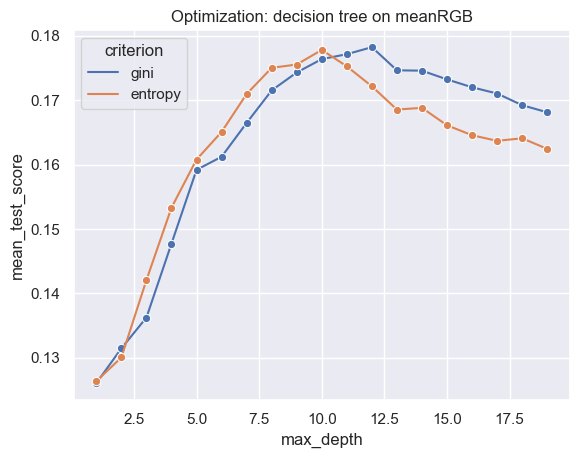

In [111]:
sns.lineplot(x = 'max_depth', y='mean_test_score', data = dt_grid_optimization, hue = 'criterion', marker = 'o' )
plt.title("Optimization: decision tree on meanRGB")

**Classification Report: macro & micro**

In [139]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

cr_dt = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'})

micro_dt = cr_dt.iloc[:-3,:]
macro_dt = cr_dt.iloc[-3:,:].rename(columns={'prdtypecode': 'metrics'})
#macro_dt.rename(columns=macro_dt.iloc[0]).drop(macro_dt.index[0])

# display(micro_dt)
# display(macro_dt)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.26      0.09      0.13       601
          40       0.00      0.00      0.00       475
          50       0.09      0.02      0.03       341
          60       0.00      0.00      0.00       176
        1140       0.02      0.01      0.01       552
        1160       0.14      0.34      0.20       791
        1180       0.00      0.00      0.00       139
        1280       0.10      0.12      0.11       944
        1281       0.03      0.00      0.00       415
        1300       0.15      0.17      0.16      1006
        1301       0.25      0.03      0.05       154
        1302       0.09      0.02      0.03       505
        1320       0.14      0.04      0.06       635
        1560       0.13      0.12      0.13       967
        1920       0.10      0.11      0.11       866
        1940       0.23      0.02      0.03       175
        2060       0.21      0.09      0.12      1060
        2220       0.00    

**Best classified cathegories (f1-score)**

In [147]:
micro_cr_dt.sort_values(by = 'f1-score', ascending=False).head()

,prdtypecode,precision,recall,f1-score,support
23,2583,0.291305,0.640587,0.400489,2045.0
21,2522,0.244068,0.290030,0.265071,993.0
19,2403,0.154894,0.371808,0.218684,979.0
5,1160,0.142246,0.336283,0.199925,791.0
9,1300,0.147708,0.172962,0.159341,1006.0


## Random forest on the mean RGB dataset

- [ ] Optimize the number of variables chossen to create Decision Tree's nodes (n)
- [ ] Compare Accuracy_RF_n for various n to find the optimal n
- [ ] Try with some values above and below n=sqrt(nF)!

In [148]:
X_train, X_test = RGB_train, RGB_test

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## estimator
rf_clf = RandomForestClassifier(max_features = 3, n_jobs = -1, random_state = 123)

## GridSearch
params = {'n_estimators' : [50,100,150],
         'criterion' : ['gini', 'entropy', 'log_loss'],
         'max_depth' : [2,5,10,15,20]}

grid_rf = GridSearchCV(estimator = rf_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, verbose = 2)

## training (timed)
t0 = time.time()

#rf_clf.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

Fitting 5 folds for each of 45 candidates, totalling 225 fits
For 67932 observations, training time = 2217.63 seconds


**Predictions**

In [179]:
#y_pred = rf_clf.predict(X_test)
y_pred = grid_rf.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
print(cm.shape)
display(cm)


(27, 27)


Predictions,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
Reality,,,,,,,,,,,,,,,,,,,,,
10,65,7,2,0,4,73,0,24,3,10,...,0,48,109,0,41,2,93,7,18,4
40,11,11,5,1,1,66,0,20,3,22,...,0,46,116,0,4,3,97,2,3,0
50,3,7,10,1,2,12,0,15,1,43,...,0,24,44,1,15,3,108,0,4,0
60,2,1,1,4,3,13,0,7,0,21,...,0,8,29,0,4,0,58,0,5,0
1140,9,9,1,1,3,43,0,23,1,45,...,0,58,125,1,20,0,107,2,5,0
1160,18,7,0,0,5,215,1,19,2,19,...,0,81,235,1,10,5,113,1,3,0
1180,4,3,0,0,2,13,0,3,0,15,...,0,13,36,0,4,0,30,0,2,0
1280,16,9,3,0,8,49,0,116,10,85,...,1,63,119,0,58,4,174,7,8,2
1281,6,8,0,0,2,34,0,48,2,15,...,1,33,81,0,22,1,69,1,6,1


**Train-Test accuracy**

In [156]:
# rf_accuracy_train = rf_clf.score(X_train, y_train)
# rf_accuracy_test = rf_clf.score(X_test, y_test)

rf_accuracy_train = grid_rf.score(X_train, y_train)
rf_accuracy_test = grid_rf.score(X_test, y_test)


print("Train set accuracy %0.3f" % rf_accuracy_train)
print("Test  set accuracy %0.3f" % rf_accuracy_test)

Train set accuracy 0.575
Test  set accuracy 0.219


**Grid optimization evaluation**

In [188]:
print(grid_rf.best_params_)

grid_rf_optimization = pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,['params', 'mean_test_score']]
print(grid_rf_optimization)

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 150}
                                               params  mean_test_score
0   {'criterion': 'gini', 'max_depth': 2, 'n_estim...         0.133501
1   {'criterion': 'gini', 'max_depth': 2, 'n_estim...         0.133663
2   {'criterion': 'gini', 'max_depth': 2, 'n_estim...         0.133707
3   {'criterion': 'gini', 'max_depth': 5, 'n_estim...         0.163973
4   {'criterion': 'gini', 'max_depth': 5, 'n_estim...         0.163767
5   {'criterion': 'gini', 'max_depth': 5, 'n_estim...         0.164105
6   {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.194916
7   {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.196314
8   {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.196078
9   {'criterion': 'gini', 'max_depth': 15, 'n_esti...         0.210078
10  {'criterion': 'gini', 'max_depth': 15, 'n_esti...         0.212433
11  {'criterion': 'gini', 'max_depth': 15, 'n_esti...         0.212669
12  {'criterion':

In [189]:
grid_rf_optimization['n_estimators'] = [val['n_estimators'] for val in grid_rf_optimization['params']]
grid_rf_optimization['criterion'] = [val['criterion'] for val in grid_rf_optimization['params']]
grid_rf_optimization['max_depth'] = [val['max_depth'] for val in grid_rf_optimization['params']]

grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization.head()

,mean_test_score,n_estimators,criterion,max_depth
0,0.133501,50,gini,2
1,0.133663,100,gini,2
2,0.133707,150,gini,2
3,0.163973,50,gini,5
4,0.163767,100,gini,5


Text(0.5, 1.0, 'Optimization: random forest on meanRGB')

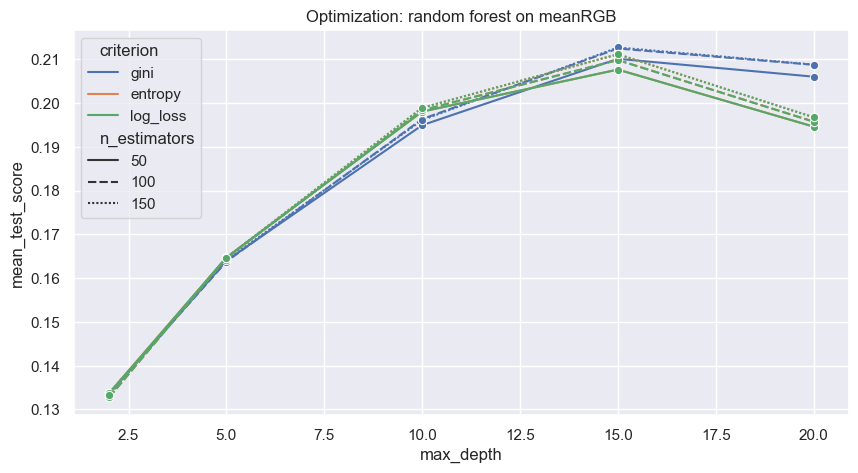

In [190]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='n_estimators', marker = 'o')
plt.title("Optimization: random forest on meanRGB")

**Classification Report: macro & micro**

In [195]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

,prdtypecode,precision,recall,f1-score,support
0,10,0.201238,0.108153,0.140693,601.0
1,40,0.069182,0.023158,0.034700,475.0
2,50,0.212766,0.029326,0.051546,341.0
3,60,0.363636,0.022727,0.042781,176.0
4,1140,0.033708,0.005435,0.009360,552.0
5,1160,0.159970,0.271808,0.201405,791.0
6,1180,0.000000,0.000000,0.000000,139.0
7,1280,0.125677,0.122881,0.124264,944.0
8,1281,0.030303,0.004819,0.008316,415.0
9,1300,0.229522,0.267396,0.247016,1006.0


,metrics,precision,recall,f1-score,support
27,accuracy,NaN,NaN,0.219383,16984.0
28,macro avg,0.194933,0.126704,0.120121,16984.0
29,weighted avg,0.203126,0.219383,0.181108,16984.0


In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.20      0.11      0.14       601
          40       0.07      0.02      0.03       475
          50       0.21      0.03      0.05       341
          60       0.36      0.02      0.04       176
        1140       0.03      0.01      0.01       552
        1160       0.16      0.27      0.20       791
        1180       0.00      0.00      0.00       139
        1280       0.13      0.12      0.12       944
        1281       0.03      0.00      0.01       415
        1300       0.23      0.27      0.25      1006
        1301       0.56      0.06      0.12       154
        1302       0.20      0.05      0.08       505
        1320       0.14      0.06      0.08       635
        1560       0.18      0.18      0.18       967
        1920       0.13      0.14      0.13       866
        1940       0.12      0.01      0.02       175
        2060       0.21      0.13      0.16      1060
        2220       0.33    

**Top classified cathegories**

In [197]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
23,2583,0.336591,0.724205,0.459581,2045.0
21,2522,0.282258,0.317221,0.298720,993.0
9,1300,0.229522,0.267396,0.247016,1006.0
19,2403,0.153522,0.409602,0.223336,979.0
5,1160,0.159970,0.271808,0.201405,791.0


## KNN clustering @ meanRGB

## SVM @ meanRGB

# Modeling on pixel features

### Load preprocessed image dataset:
* cropped & resized images
* vectorized images
* computed mean RGB values: $\overline{R}_{img}$, $\overline{G}_{img}$, $\overline{B}_{img}$

In [11]:
### test recover df from pickle
read_df_meanRGBs = True
filename = preprocessing_path + 'df_vectorized_images_meanRGBs.pkl'

t0 = time.time()

if read_df_meanRGBs:
    df_images = pd.read_pickle(filename)

    display(df_images.head())
    print(df_images.shape)

print("Total time to read = %0.2f seconds" %(time.time()-t0))    

,prdtypecode,productid,imageid,meanR,meanG,meanB,px_0,px_1,px_2,px_3,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
0,10,3804725264,1263597046,205.4529,206.5443,234.1815,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2280,436067568,1008141237,167.7998,172.5678,176.3561,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,50,201115110,938777978,251.9491,248.2853,244.1458,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,1280,50418756,457047496,76.9653,82.1617,111.9041,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,2705,278535884,1077757786,209.4138,198.2848,174.6685,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


(84916, 30006)
Total time to read = 9.39 seconds


## Mini dataset
Reduce the size of the dataset for an intial try.  
Keep 10% of it.

In [12]:
fraction = 1.0

mini_size = int(fraction*df_images.shape[0])  #10000

print("Take %0.2f %% of the dataset: %d rows" %(fraction*100, mini_size))


# df_images = df_images.iloc[:mini_size, :]
# print(df_images.shape)
# display(df_images.head())

Take 100.00 % of the dataset: 84916 rows


## Data target - feature separation

In [13]:
# data_RGB = df_images[['meanR','meanG','meanB']]
# data_pixels = df_images.iloc[:, 6:]

data = df_images.iloc[:mini_size, :].drop(['prdtypecode', 'productid', 'imageid'], axis = 1)
target = df_images.iloc[:mini_size, :].loc[:mini_size,'prdtypecode']

print(type(data), type(target))
print(data.shape, target.shape)
display(data.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(84916, 30003) (84916,)


,meanR,meanG,meanB,px_0,px_1,px_2,px_3,px_4,px_5,px_6,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
0,205.4529,206.5443,234.1815,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,167.7998,172.5678,176.3561,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,251.9491,248.2853,244.1458,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,76.9653,82.1617,111.9041,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,209.4138,198.2848,174.6685,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [15]:
from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, 
                                                          random_state = my_seed, stratify = target)

# RGB_train = data_train[['meanR','meanG','meanB']]
# RGB_test = data_test[['meanR','meanG','meanB']]

# Pic_train = data_train.drop(['meanR','meanG','meanB'], axis = 1)
# Pic_test = data_test.drop(['meanR','meanG','meanB'], axis = 1)

X_train = data_train.drop(['meanR','meanG','meanB'], axis = 1)
X_test = data_test.drop(['meanR','meanG','meanB'], axis = 1)


print(type(data_train), type(y_train))
# print(RGB_train.shape, RGB_test.shape)
print(y_train.shape, y_test.shape)
# display(Pic_train.head())
display(X_train.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(67932,) (16984,)


,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_29990,px_29991,px_29992,px_29993,px_29994,px_29995,px_29996,px_29997,px_29998,px_29999
9263,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
50884,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
73788,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
34901,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
81204,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [16]:
y_train.index

Int64Index([ 9263, 50884, 73788, 34901, 81204, 26065, 46256, 70161, 24947,
            32350,
            ...
            29427,  6336, 69930, 71944, 18110, 19372, 79662, 38386, 84570,
            60763],
           dtype='int64', length=67932)

In [22]:
### Free memory

del df_images
del data_train
del data_test

## Random forest on pixels
- [ ] Optimize at the end **'n_estimators'**. The larger the better, but it takes more time to train.
- [ ] Reduce parameter to prevent overfitting, at the cost of lowering accuracy in training set.

In [99]:
X_train, X_test = Pic_train, Pic_test

In [544]:
list(int(np.sqrt(X_train.shape[1])) + np.arange(-30,10,7))
#list(np.range())
#X_train.shape[1]

[143, 150, 157, 164, 171, 178]

In [100]:
np.arange(2,22,2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## estimator
rf_clf_px = RandomForestClassifier(criterion = 'entropy', max_features = 150, max_depth = 11,\
                                   n_jobs = -1, random_state = 123)

## GridSearch
# params = {'max_depth' : np.arange(2,32,2) } #,
# #           'max_features' : list(int(np.sqrt(X_train.shape[1])) + np.arange(-30,10,7))}


# grid_rf_px = GridSearchCV(estimator = rf_clf_px, param_grid = params, scoring = 'accuracy', n_jobs = -1, \
#                           return_train_score=True) #verbose = 2

## training (timed)
t0 = time.time()

rf_clf_px.fit(X_train, y_train)
# grid_rf_px.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 33966 observations, training time = 103.92 seconds
_20230805_1841


In [28]:
rf_clf_px.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 150,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

**Grid optimization evaluation**

In [11]:
## Best estimators
print("Best estimator:", grid_rf_px.best_params_)


## Grid evaluation:
to_display = ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
grid_rf_optimization = pd.DataFrame.from_dict(grid_rf_px.cv_results_).loc[:,to_display]
#print(grid_rf_optimization)


## export grid_cv_results
export = True
time_stamp = model_date_time
if export:
    filename = 'grid_rf_cv_results' + time_stamp + '.csv'
    pd.DataFrame.from_dict(grid_rf_px.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

Best estimator: {'max_depth': 22}
grid_rf_cv_results_20230805_1718.csv


In [12]:
## Formating into dataframe: 

for key in params.keys():
    grid_rf_optimization[key] = [val[key] for val in grid_rf_optimization['params']]

#grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization

,params,mean_test_score,std_test_score,mean_train_score,std_train_score,max_depth
0,{'max_depth': 2},0.193134,0.003335,0.194025,0.001036,2
1,{'max_depth': 4},0.249308,0.005750,0.251781,0.001780,4
2,{'max_depth': 6},0.286787,0.005394,0.296134,0.001157,6
3,{'max_depth': 8},0.321056,0.005613,0.392149,0.002309,8
4,{'max_depth': 10},0.357593,0.006004,0.615689,0.003605,10
5,{'max_depth': 12},0.383030,0.008813,0.844896,0.002994,12
6,{'max_depth': 14},0.394336,0.007598,0.972046,0.002291,14
7,{'max_depth': 16},0.401284,0.007637,0.996585,0.000469,16
8,{'max_depth': 18},0.401401,0.008235,0.998197,0.000130,18
9,{'max_depth': 20},0.402932,0.009761,0.998211,0.000106,20


**Plot Optimization of current model**

Text(0.5, 0.98, 'Optimization: Random Forest on meanRGB')

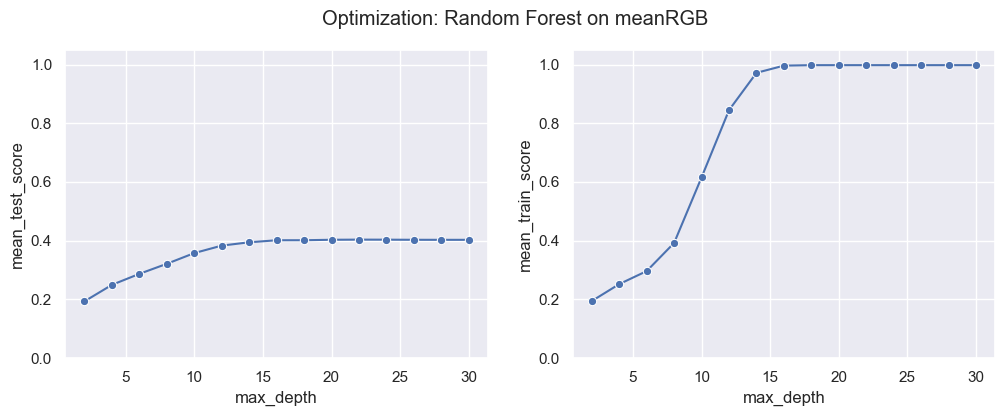

In [13]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')


sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[0])

# sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[0], ls = ':', palette="crest")


sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[1])

# sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[1], ls = ':', palette="crest")

for ax in axs:
    ax.set_ylim(0,1.05)
#     ax.set_xscale("log")
#     leg = ax.legend()
#     leg_lines = leg.get_lines()
# #     leg_lines[1].set_linestyle(":")
#     leg_lines[2].set_linestyle(":")
#     leg_lines[3].set_linestyle(":")
    
#plt.legend(title='Day of Week')
# plt.legend(labels = ['a', 'F', 'S', 'y'])
fig.suptitle("Optimization: Random Forest on meanRGB")

**Predictions**

In [29]:
y_pred = rf_clf_px.predict(X_test)
# y_pred = grid_rf_px.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
print(cm.shape)
#display(cm)


(27, 27)


(27, 27)


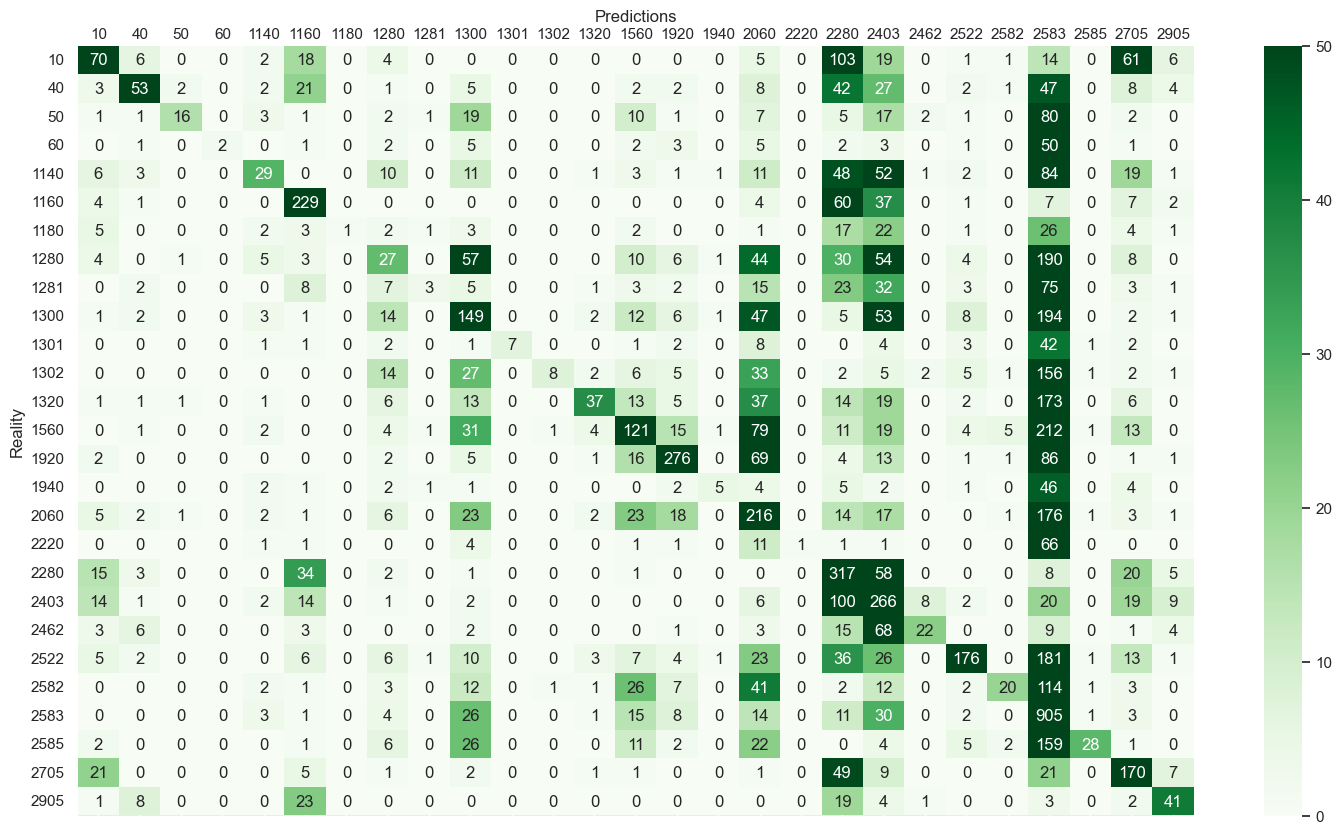

In [30]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 50)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [31]:
export = True

if export:
    filename = 'Model_rf_optimmized' + model_date_time + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

Model_rf_optimmized_20230805_1841_confusionMatrix.csv


**Train-Test accuracy**

In [32]:
rf_accuracy_train = rf_clf_px.score(X_train, y_train)
rf_accuracy_test = rf_clf_px.score(X_test, y_test)

# rf_accuracy_train = grid_rf_px.score(X_train, y_train)
# rf_accuracy_test = grid_rf_px.score(X_test, y_test)


print("Train set accuracy %0.3f" % rf_accuracy_train)
print("Test  set accuracy %0.3f" % rf_accuracy_test)

Train set accuracy 0.697
Test  set accuracy 0.376


**Classification Report: macro & micro**

In [33]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.43      0.23      0.30       310
          40       0.57      0.23      0.33       230
          50       0.76      0.09      0.17       169
          60       1.00      0.03      0.05        78
        1140       0.47      0.10      0.17       283
        1160       0.61      0.65      0.63       352
        1180       1.00      0.01      0.02        91
        1280       0.21      0.06      0.09       444
        1281       0.38      0.02      0.03       183
        1300       0.34      0.30      0.32       501
        1301       1.00      0.09      0.17        75
        1302       0.80      0.03      0.06       270
        1320       0.66      0.11      0.19       329
        1560       0.42      0.23      0.30       525
        1920       0.75      0.58      0.65       478
        1940       0.50      0.07      0.12        76
        2060       0.30      0.42      0.35       512
        2220       1.00    

**Top classified cathegories**

In [35]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
14,1920,0.752044,0.577406,0.653254,478.0
5,1160,0.607427,0.650568,0.628258,352.0
25,2705,0.449735,0.590278,0.510511,288.0
21,2522,0.775330,0.350598,0.482853,502.0
18,2280,0.339037,0.683190,0.453181,464.0


**Save Classification report**

In [36]:
export = True

if export:
    filename = 'Model_rf_optimmized' + model_date_time + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

Model_rf_optimmized_20230805_1841_classificationReport.txt


### Learning Curve

In [583]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 

rf_clf = RandomForestClassifier(criterion = 'entropy', max_features = 150, max_depth = 10,\
                                n_jobs = -1, random_state = 123)

train_sizes=[0.2,0.4,0.6,0.8,1.0]

t0 = time.time()
train_sizes, train_scores, test_scores = learning_curve(rf_clf, X_train, y_train, n_jobs=-1,\
                                                        train_sizes=train_sizes)
t1 = time.time()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

learnCurve_date_time = date_time()
print(learnCurve_date_time)

In [588]:
## export learning curve output
export = True

if export:
    filename = 'learningCurve_rf' + learnCurve_date_time + '.csv'
    
    learningCurve_dict = {'train_scores_mean' : train_scores_mean,
               'train_scores_std' : train_scores_std,
               'test_scores_mean' : test_scores_mean,
               'test_scores_std' : test_scores_std,}
    
    pd.DataFrame.from_dict(learningCurve_dict).to_csv(filename, header=True, index=False)
    print(filename)

learningCurve_rf_20230803_0146.csv


Text(0.5, 1.0, 'learningCurve_rf_20230803_0146.csv')

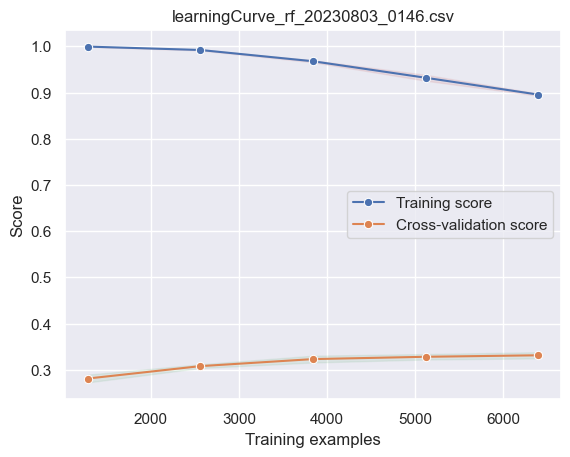

In [589]:
sns.set()
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
sns.lineplot(x = train_sizes, y = train_scores_mean, marker ='o',
             label="Training score")
sns.lineplot(x = train_sizes, y = test_scores_mean, marker = 'o',
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
#plt.ylim(0,1)

plt.legend(loc="best")
plt.grid()
plt.title(filename)


**Save trained model hyperparameters**

In [591]:
export = True

if export:
    filename = 'learningModel_rf' + learnCurve_date_time + '.txt'
    print(filename)
    
    with open(filename, 'w') as file:
        file.write(json.dumps(rf_clf.get_params()))

learningModel_rf_20230803_0146.txt


In [377]:
export = False

if export:
    filename = 'learningModel_rf' + learnCurve_date_time + '.txt'
    
    with open(filename, 'r') as file:
        test_dict = json.load(file)
        
test_dict

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1e-09,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## SVM.SVC model on pixels

In [7]:
X_train, X_test = Pic_train, Pic_test

In [25]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## estimator
svc_clf = svm.SVC(C = 10, kernel = 'rbf', gamma=1e-9) #kernel = 'poly', gamma = 0.01

## GridSearch
# params = {'gamma' : [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6]}#,
# #          'C' : [1e3,1e4,1e5,1e6] }

# grid_svc = GridSearchCV(estimator = svc_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, cv = 3,\
#                           return_train_score=True, verbose = 3)

## training (timed)
t0 = time.time()

svc_clf.fit(X_train, y_train)
# grid_svc.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 33966 observations, training time = 16828.50 seconds
_20230803_0742


In [3]:
save = False
reload = False

#saved_model = 'Model_svm_optimmized' + model_date_time + '.joblib'
saved_model = 'Model_svm_optimmized' + '_20230803_0742' + '.joblib'

from joblib import dump, load

if save:
    dump(svc_clf, saved_model) #

if reload:
#     my_model=load(saved_model)
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

In [14]:
print("reloaded model: ", saved_model)

reloaded model:  Model_svm_optimmized_20230803_0742.joblib


In [36]:
# import pickle
# saved_model_pkl = 'Model_svm_optimmized' + model_date_time + '.pkl'

# #saves the model
# pickle.dump(svc_clf, open(saved_model_pkl, 'wb'))

# #loads the model
# loaded_model = pickle.load(open(filename, 'rb'))

OSError: [Errno 28] No space left on device

In [4]:
# my_model.get_params()
svc_clf.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1e-09,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Grid optimization evaluation**

In [479]:
## Best estimators
print("Best estimator:", grid_svc.best_params_)


## Grid evaluation:
to_display = ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
grid_svc_optimization = pd.DataFrame.from_dict(grid_svc.cv_results_).loc[:,to_display]


## export grid_cv_results
export = True
time_stamp = model_date_time
if export:
    filename = 'grid_svc_cv_results' + time_stamp + '.csv'
    pd.DataFrame.from_dict(grid_svc.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

Best estimator: {'gamma': 1e-08}
grid_svc_cv_results_20230802_1920.csv


In [480]:
## Formating into dataframe: 

for key in params.keys():
    grid_svc_optimization[key] = [val[key] for val in grid_svc_optimization['params']]

#grid_svc_optimization = grid_svc_optimization.drop('params', axis = 1)

grid_svc_optimization

,params,mean_test_score,std_test_score,mean_train_score,std_train_score,gamma
0,{'gamma': 1e-11},0.190250,0.002007,0.195063,0.004597,1.000000e-11
1,{'gamma': 1e-10},0.256625,0.002129,0.289938,0.001034,1.000000e-10
2,{'gamma': 1e-09},0.315125,0.001485,0.748937,0.002726,1.000000e-09
3,{'gamma': 1e-08},0.325500,0.005168,0.996438,0.000405,1.000000e-08
4,{'gamma': 1e-07},0.142000,0.001735,0.999750,0.000088,1.000000e-07
5,{'gamma': 1e-06},0.126125,0.001137,0.999750,0.000088,1.000000e-06


**Compare to previous models ?**

In [492]:
### load params from previous model for comparison (or skip)

grid_svc_v0 = pd.read_csv('grid_svc_cv_results_20230801_1553.csv')

import json

for key in ['C','gamma']:
#for key in params.keys():
    print(key)
    grid_svc_v0[key] = [json.loads(val.replace("'",'"'))[key] for val in grid_svc_v0['params']]

grid_svc_v0

C
gamma


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,C,gamma
0,201.445019,0.325587,33.452681,0.331173,100,1.000000e-14,"{'C': 100, 'gamma': 1e-14}",0.109375,0.109375,0.109375,...,25,0.110937,0.110937,0.110937,0.110156,0.110156,0.110625,0.000383,100,1.000000e-14
1,216.862695,0.519106,33.894393,0.702807,100,1.000000e-13,"{'C': 100, 'gamma': 1e-13}",0.109375,0.109375,0.109375,...,25,0.110937,0.110937,0.110937,0.110156,0.110156,0.110625,0.000383,100,1.000000e-13
2,221.178868,1.769092,32.643076,0.507555,100,1.000000e-12,"{'C': 100, 'gamma': 1e-12}",0.134375,0.137500,0.128125,...,10,0.133594,0.127344,0.132031,0.129688,0.136719,0.131875,0.003217,100,1.000000e-12
3,205.215806,1.272347,34.304262,1.800967,100,1.000000e-11,"{'C': 100, 'gamma': 1e-11}",0.206250,0.237500,0.218750,...,8,0.264844,0.271875,0.270313,0.271094,0.264062,0.268437,0.003300,100,1.000000e-11
4,211.629532,1.537415,34.292981,4.020696,100,1.000000e-10,"{'C': 100, 'gamma': 1e-10}",0.225000,0.240625,0.246875,...,5,0.807813,0.812500,0.805469,0.810156,0.808594,0.808906,0.002349,100,1.000000e-10
5,239.159969,1.137372,33.110179,1.061050,100,1.000000e-09,"{'C': 100, 'gamma': 1e-09}",0.240625,0.231250,0.259375,...,6,0.996875,0.993750,0.996875,0.996875,0.993750,0.995625,0.001531,100,1.000000e-09
6,278.260488,3.204833,35.869055,3.287785,100,1.000000e-08,"{'C': 100, 'gamma': 1e-08}",0.246875,0.212500,0.287500,...,3,1.000000,0.999219,0.999219,1.000000,0.999219,0.999531,0.000383,100,1.000000e-08
7,282.928067,3.128512,35.633558,3.582622,100,1.000000e-07,"{'C': 100, 'gamma': 1e-07}",0.112500,0.115625,0.125000,...,14,1.000000,0.999219,0.999219,1.000000,0.999219,0.999531,0.000383,100,1.000000e-07
8,282.599370,2.455348,35.053757,3.759694,100,1.000000e-06,"{'C': 100, 'gamma': 1e-06}",0.112500,0.112500,0.112500,...,16,1.000000,0.999219,0.999219,1.000000,0.999219,0.999531,0.000383,100,1.000000e-06
9,283.328055,2.448023,35.305109,3.995358,100,1.000000e-05,"{'C': 100, 'gamma': 1e-05}",0.112500,0.112500,0.112500,...,16,1.000000,0.999219,0.999219,1.000000,0.999219,0.999531,0.000383,100,1.000000e-05


**Plot Optimization of current model**

Text(0.5, 0.98, 'Optimization: SVM.SVC on meanRGB')

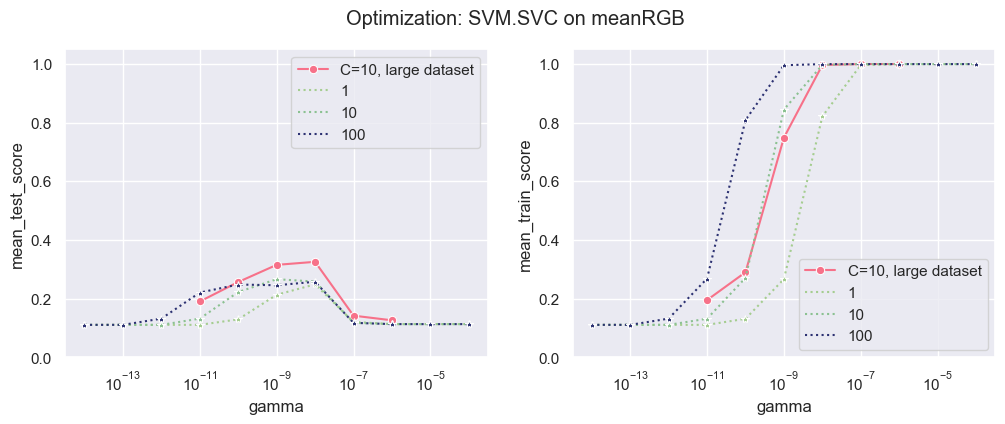

In [536]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')


sns.lineplot(x = 'gamma', y='mean_test_score', data = grid_svc_optimization,\
             marker = 'o', ax= axs[0], label = 'C=10, large dataset')

sns.lineplot(x = 'gamma', y='mean_test_score', data = grid_svc_v0, hue = 'C',\
             marker = '*', ax= axs[0], ls = ':', palette="crest")



sns.lineplot(x = 'gamma', y='mean_train_score', data = grid_svc_optimization,\
             marker = 'o', ax= axs[1], label = 'C=10, large dataset')

sns.lineplot(x = 'gamma', y='mean_train_score', data = grid_svc_v0, hue = 'C',\
             marker = '*', ax= axs[1], ls = ':', palette="crest")

for ax in axs:
    ax.set_ylim(0,1.05)
    ax.set_xscale("log")
    leg = ax.legend()
    leg_lines = leg.get_lines()
    leg_lines[1].set_linestyle(":")
    leg_lines[2].set_linestyle(":")
    leg_lines[3].set_linestyle(":")
    
#plt.legend(title='Day of Week')
# plt.legend(labels = ['a', 'F', 'S', 'y'])
fig.suptitle("Optimization: SVM.SVC on meanRGB")

In [155]:
# fig, axs = plt.subplots(1,2,figsize = (12,4), sharey = False)

# model_A = grid_svc_optimization[grid_svc_optimization['kernel']=='linear']
# sns.lineplot(x = 'C', y='mean_test_score', data = model_A, marker = 'o', ax= axs[0])
# sns.lineplot(x = 'C', y='mean_train_score', data = model_A, marker = 'o', ax= axs[0])
# axs[0].set_title("linear kernel")

# model_B = grid_svc_optimization[grid_svc_optimization['kernel']=='rbf']
# sns.lineplot(x = 'C', y='mean_test_score', data = model_B, marker = 'o', ax= axs[1])
# sns.lineplot(x = 'C', y='mean_train_score', data = model_B, marker = 'o', ax= axs[1])
# axs[1].set_title("rbf kernel")

# for ax in axs:
#     ax.set_ylim(0,1.05)

# fig.suptitle("Optimization: SVM.SVC vectorized images")

### Single Model Evaluation

**Train-Test accuracy**

In [13]:
svc_accuracy_train = svc_clf.score(X_train, y_train)
svc_accuracy_test = svc_clf.score(X_test, y_test)

# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

print("Train set accuracy %0.3f" % svc_accuracy_train)
print("Test  set accuracy %0.3f" % svc_accuracy_test)

Train set accuracy 0.654
Test  set accuracy 0.375


**Predictions**

In [18]:
t0 = time.time()

y_pred = svc_clf.predict(X_test)
#y_pred = grid_svc.predict(X_test)

t1 = time.time()
print("Done in %0.2f" %(t1-t0))

cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
#print(cm.shape)
#display(cm)


Done in 7146.98


In [57]:
cm

Predictions,10,40,50,60,1140,1160,1180,1280,1281,1300,...,2220,2280,2403,2462,2522,2582,2583,2585,2705,2905
Reality,,,,,,,,,,,,,,,,,,,,,
10,89,5,0,0,4,9,0,7,2,1,...,0,73,19,0,13,0,16,0,43,8
40,6,76,2,1,3,12,0,8,3,10,...,0,27,19,0,2,1,16,1,5,14
50,0,7,25,2,4,0,0,14,3,32,...,0,6,13,1,5,1,32,5,0,0
60,0,4,1,6,1,0,0,10,1,15,...,0,0,2,0,4,1,21,1,1,0
1140,15,3,2,1,56,4,0,26,1,20,...,0,30,41,1,3,0,41,0,8,1
1160,10,3,0,0,1,252,0,3,1,2,...,0,39,24,0,0,0,5,0,6,1
1180,4,2,0,0,5,3,3,6,1,11,...,0,15,15,0,2,1,5,1,5,1
1280,10,3,3,0,21,7,0,65,4,66,...,0,20,33,1,10,1,86,3,8,2
1281,2,6,0,0,8,9,0,30,4,8,...,0,17,27,0,6,0,23,2,4,2


(27, 27)


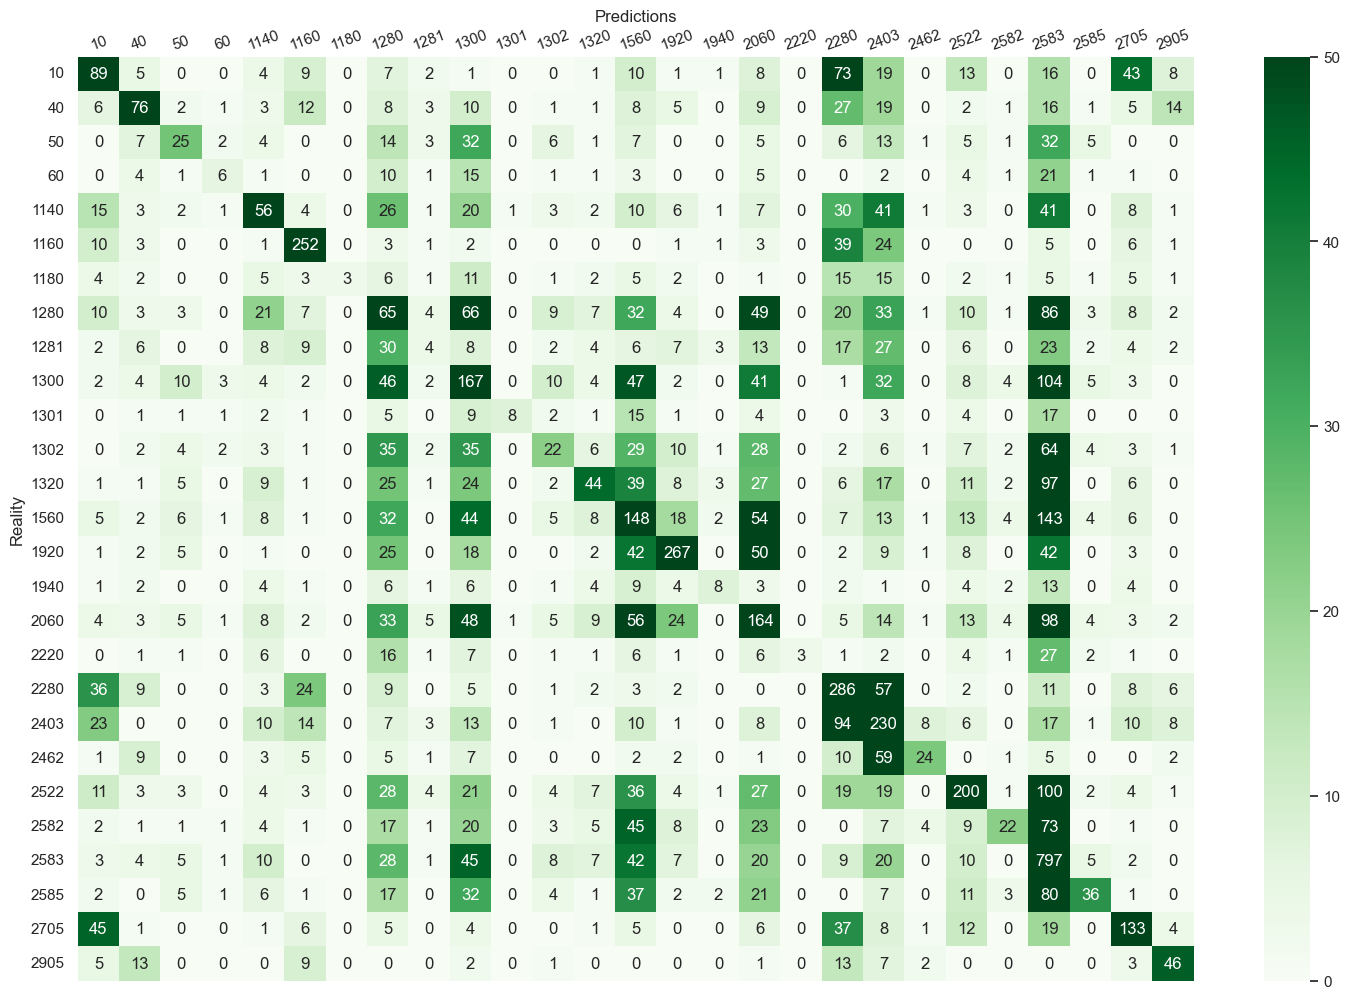

In [54]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,12))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 50)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')
plt.yticks(rotation = 0);
plt.xticks(rotation = 20);

**Save confusion matrix**

In [59]:
export = False

if export:
    filename = 'Model_svm_optimmized_20230803_0742' + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

Model_svm_optimmized_20230803_0742_confusionMatrix.csv


In [ ]:
## export grid_cv_results
export = True
time_stamp = model_date_time
if export:
    filename = 'grid_rf_cv_results' + time_stamp + '.csv'
    pd.DataFrame.from_dict(grid_rf_px.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

**Classification Report: macro & micro**

In [20]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.32      0.29      0.30       310
          40       0.46      0.33      0.38       230
          50       0.30      0.15      0.20       169
          60       0.29      0.08      0.12        78
        1140       0.30      0.20      0.24       283
        1160       0.68      0.72      0.70       352
        1180       1.00      0.03      0.06        91
        1280       0.13      0.15      0.14       444
        1281       0.10      0.02      0.04       183
        1300       0.25      0.33      0.28       501
        1301       0.80      0.11      0.19        75
        1302       0.24      0.08      0.12       270
        1320       0.36      0.13      0.20       329
        1560       0.23      0.28      0.25       525
        1920       0.69      0.56      0.62       478
        1940       0.35      0.11      0.16        76
        2060       0.28      0.32      0.30       512
        2220       1.00    

**Top classified cathegories**

In [21]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
5,1160,0.684783,0.715909,0.700000,352.0
14,1920,0.689922,0.558577,0.617341,478.0
23,2583,0.408299,0.778320,0.535618,1024.0
18,2280,0.396671,0.616379,0.482700,464.0
25,2705,0.490775,0.461806,0.475850,288.0


**Save Classification report**

In [61]:
export = False

if export:
    filename = 'Model_svm_optimmized_20230803_0742' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

Model_svm_optimmized_20230803_0742_classificationReport.txt


### Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 

svc_clf = svm.SVC(C = 10, kernel = 'rbf', gamma=1e-9) 

train_sizes=[0.2,0.4,0.6,0.8,1.0]

t0 = time.time()
train_sizes, train_scores, test_scores = learning_curve(svc_clf, X_train, y_train, n_jobs=-1, train_sizes=train_sizes)
t1 = time.time()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


For 8000 observations, training time = 15626.64 seconds


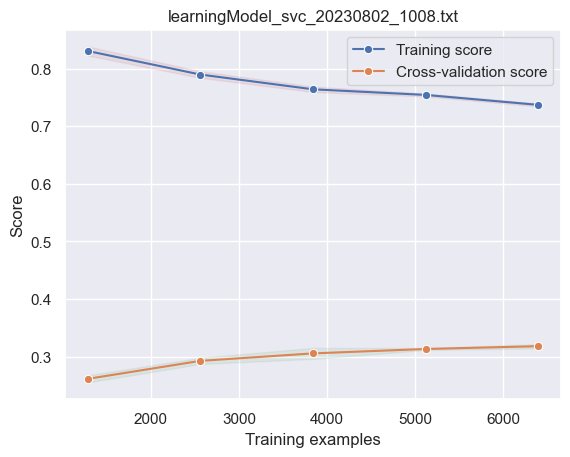

In [388]:
sns.set()
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
sns.lineplot(x = train_sizes, y = train_scores_mean, marker ='o',
             label="Training score")
sns.lineplot(x = train_sizes, y = test_scores_mean, marker = 'o',
             label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
#plt.ylim(0,1)

plt.legend(loc="best")
plt.grid()
plt.title(filename)
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

In [373]:
## export learning curve output
export = True

learnCurve_date_time = date_time()
print(learnCurve_date_time)

if export:
    filename = 'learningCurve_svc_' + learnCurve_date_time + '.csv'
    
    learningCurve_dict = {'train_scores_mean' : train_scores_mean,
               'train_scores_std' : train_scores_std,
               'test_scores_mean' : test_scores_mean,
               'test_scores_std' : test_scores_std,}
    
    pd.DataFrame.from_dict(learningCurve_dict).to_csv(filename, header=True, index=False)
    print(filename)

_20230802_1008
learningCurve_svc__20230802_1008.csv


In [367]:
15626/3600/5


0.8681111111111111

In [369]:
svc_clf.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1e-09,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [374]:
export = False

if export:
    filename = 'learningModel_svc' + learnCurve_date_time + '.txt'
    print(filename)
    
    with open(filename, 'w') as file:
        file.write(json.dumps(svc_clf.get_params()))

learningModel_svc_20230802_1008.txt


In [377]:
export = False

if export:
    filename = 'learningModel_svc' + learnCurve_date_time + '.txt'
    
    with open(filename, 'r') as file:
        test_dict = json.load(file)
        
test_dict

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1e-09,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Timing single model**

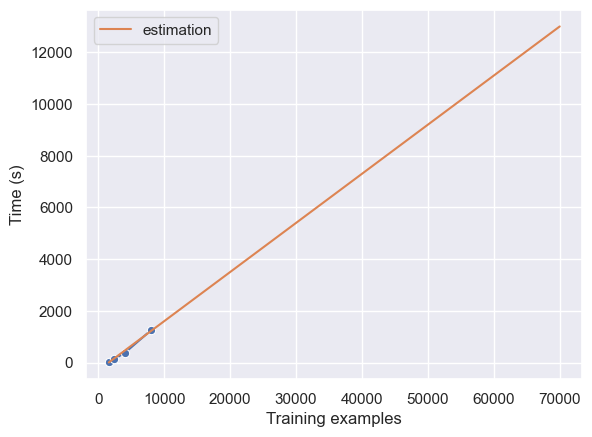

In [419]:
Xtrain_len = [1600,2400,4000,8000]
train_time = [12, 136, 369, 1249]

xx = np.linspace(1600,70000,10)

sns.lineplot(x = Xtrain_len, y=train_time, marker = 'o')
plt.plot(xx, xx*0.19-300, label='estimation')

plt.ylabel('Time (s)')
plt.xlabel('Training examples')
plt.legend();

In [414]:
13000/3600

3.611111111111111

In [420]:
20000/0.8

25000.0

# Convolution Neural Network - pixel

### Option A: Transform preprocessed data

**Reshape & Normalize pixels data**

In [23]:
X_train.to_numpy()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [208, 169, 125, ..., 207, 162, 125],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [24]:
## reshape to have 4D- matrices (nb_images, width, height, depth)

N_img_train = X_train.shape[0]
N_img_test = X_test.shape[0]
N_px = 100
N_ch = 3

XX_train = X_train.to_numpy().reshape((N_img_train, N_px, N_px, N_ch))
XX_test = X_test.to_numpy().reshape((N_img_test, N_px, N_px, N_ch))

print(XX_train.shape) 


## Re normalize pixels intensity range to [0,1]
XX_train = XX_train / 255
XX_test = XX_test / 255

(67932, 100, 100, 3)


In [25]:
XX_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

**Label encoded**

In [26]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()

y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

target_encoder.classes_
# target_encoder.inverse_transform(y_test)
# target_encoder.inverse_transform([18])

array([  10,   40,   50,   60, 1140, 1160, 1180, 1280, 1281, 1300, 1301,
       1302, 1320, 1560, 1920, 1940, 2060, 2220, 2280, 2403, 2462, 2522,
       2582, 2583, 2585, 2705, 2905], dtype=int64)

**On-Hot-Encoding of target variables**

In [28]:
from tensorflow.keras.utils import to_categorical

yy_train = to_categorical(y_train_encoded, dtype = 'int') 
yy_test = to_categorical(y_test_encoded, dtype = 'int')   

yy_train.shape   # N_train examples, N_classes

(67932, 27)

In [29]:
i = 20
print("Exmaple %d: Class '%d' is encoded as vector:"%(i, y_train.iloc[i]), y_train_encoded[i], yy_train[i,:])

Exmaple 20: Class '1300' is encoded as vector: 9 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Option B: reload preprocessed data, then transform

#### reload preprocessed data 

In [42]:
## reload saved numpy array for preprocessed image data
import os

image_train_preprocess = np.load(os.path.join(preprocessing_path, '2308111631_df_image_train_preprocess.npy'))
image_test_preprocess = np.load(os.path.join(preprocessing_path, '2308111631_df_image_test_preprocess.npy'))


## targets are in dataframes
df_y_train = pd.read_csv('../Preprocessed_data/2308102203_df_y_train.csv', header = 0, index_col = 0, sep = ',')
df_y_test = pd.read_csv('../Preprocessed_data/2308102203_df_y_test.csv', header = 0, index_col = 0, sep = ',')


In [44]:
df_y_train.index
# df_y_train.shape


Int64Index([45347, 20881, 51967, 79012, 58343, 60299, 50849,  8746, 66475,
            71218,
            ...
            63696, 13041, 28545,  9266, 67641, 54247, 71684, 46401, 60320,
            35317],
           dtype='int64', length=67932)

**Transform proprocessed data**

In [ ]:
%load_ext autoreload
%autoreload 2
import FusionModel_tools as fm
import importlib
importlib.reload(fm)

image_data = fm.get_image_data(image_train_preprocess, image_test_preprocess)

image_data.keys()

In [ ]:
XX_train = image_data['']

### Define model : CNN layers

In [32]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical


## data dimensions
# Nb_features = X_train.shape[1]
Nb_classes = yy_train.shape[1]


## instantiate layers

inputs = Input(shape = (N_px, N_px, N_ch), name = "Input")

first_layer = Conv2D(filters = 32,
                     kernel_size = (5, 5),
                     padding = 'valid',
                     activation = 'relu')

second_layer = MaxPooling2D(pool_size = (2, 2))

third_layer = Dropout(rate = 0.2)

fourth_layer = Flatten()

fifth_layer = Dense(units = 512,
                    activation = 'relu')

output_layer = Dense(units = Nb_classes,
                     activation='softmax')



## link layers & model

x=first_layer(inputs)
x=second_layer(x)

x=third_layer(x)
x=fourth_layer(x)
x=fifth_layer(x)

outputs=output_layer(x)


CNN_clf = Model(inputs = inputs, outputs = outputs)

**Define training process**

In [33]:
CNN_clf.compile(loss='categorical_crossentropy',
              optimizer='adam',                
              metrics=['accuracy'])

## display architecture
CNN_clf.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               37749248  
                                                           

**Train Model**

In [34]:
t0 = time.time()

training_history = CNN_clf.fit(XX_train, yy_train,
                             validation_split = 0.2,
                             epochs = 25,
                             batch_size = 200)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

MemoryError: Unable to allocate 6.07 GiB for an array with shape (54345, 100, 100, 3) and data type float32

In [65]:
x_epochs = np.arange(1,11,1)

train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

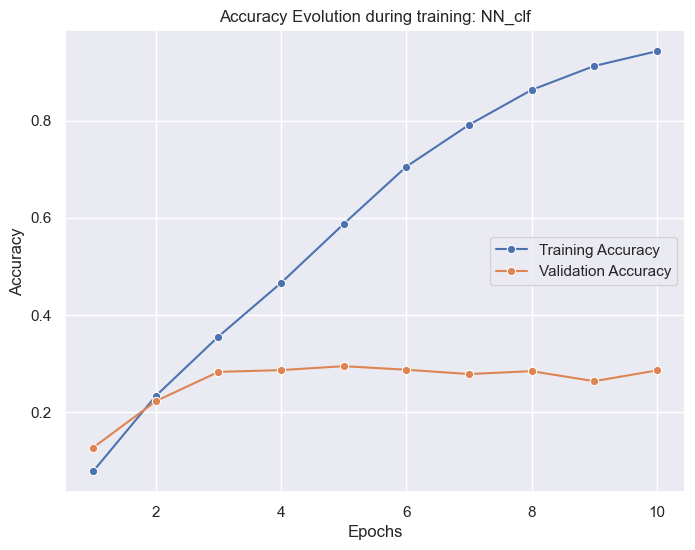

In [66]:
plt.figure(figsize=(8,6))

sns.lineplot(x = x_epochs, y = train_acc, marker = 'o', label = 'Training Accuracy')
sns.lineplot(x = x_epochs, y = val_acc, marker = 'o', label = 'Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend(loc='right')

**train test accuracy**

In [69]:
loss_train, NN_accuracy_train = CNN_clf.evaluate(XX_train, yy_train)
loss_test, NN_accuracy_test = CNN_clf.evaluate(XX_test, yy_test)

# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

print("Train set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_train, loss_train) )
print("Test  set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_test, loss_test))

54/54 [==============================] - 1s 23ms/step - loss: 3.3037 - accuracy: 0.3214
Train set accuracy = 0.832 and loss function = 0.86
Test  set accuracy = 0.321 and loss function = 3.30


**predictions**

In [70]:
y_pred_vectors = CNN_clf.predict(XX_test)

## reverse One-hot-encoding
y_pred_class = y_pred_vectors.argmax(axis = 1)
yy_test_class = yy_test.argmax(axis = 1)

## reverse label encoder
y_pred = target_encoder.inverse_transform(y_pred_class)
yy_test_prdCode = target_encoder.inverse_transform(yy_test_class)   # should be equal to y_test


54/54 [==============================] - 2s 23ms/step


In [71]:
print(yy_test_prdCode)
print(y_test.values)

[2522   50 1160 ... 2280 2585 1280]
[2522   50 1160 ... 2280 2585 1280]


In [72]:
cm = pd.crosstab(y_test, y_pred, rownames=['Reality'], colnames=['Predictions'])
#print(cm.shape)
#display(cm)

(27, 27)


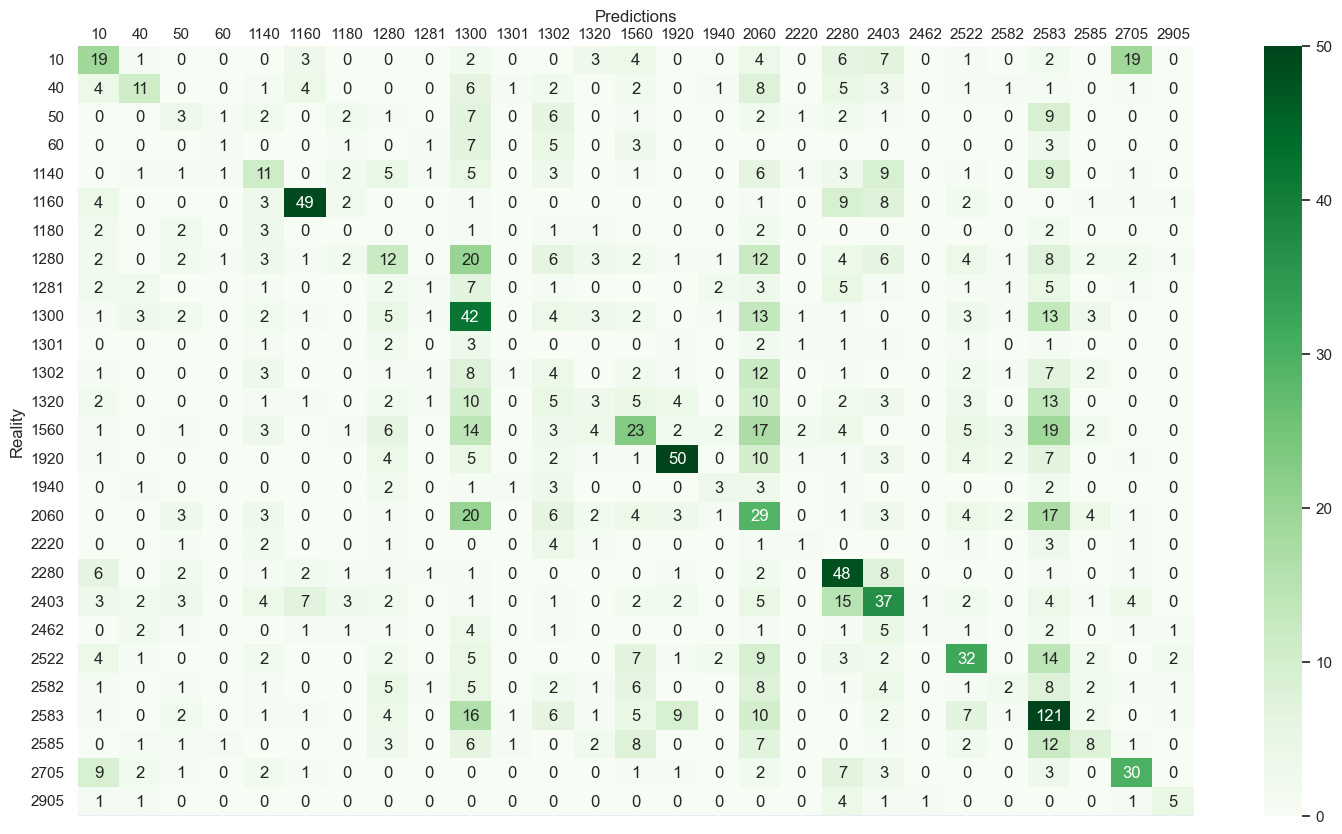

In [73]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 50)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

### Parameter tunning

**My grid search**

In [ ]:
def my_grid_search(params, X_train, y_train, X_test, y_test, Nepoch = 200, batch_sz = 200):
    
    '''
    params : d1_unit, d1_act
    '''
    
    ## build model
    Nb_features = X_train.shape[1]
    Nb_classes = y_train.shape[1]
    
    param_trained = []
    train_histories = []
    
    acc_train = []
    acc_test = []

    losses_train = []
    losses_test = []

    
    for l1_filter in params['l1_filter']:
        for l1_kernel in params['l1_kernel']:
            for l1_act in params['l1_act']:
                for l3_rate in params['l3_rate']:
                    for l5_units in params['l5_units']:
                        for l5_act in params['l5_act']:
            
                            param_trained.append( (l1_filter, l1_kernel, l1_act, l3_rate, l5_units, l5_act) ) 
                            CNN_clf = initialize_model(img_shape, Nb_classes, \
                                                         l1_filters = l1_filter, l1_kernel = l1_kernel, l1_act=l1_act, \
                                                         l3_rate = l3_rate, \
                                                         l5_units = l5_units, l5_act = l5_act)

                            ## train model
                            training_history = CNN_clf.fit(X_train.toarray(), y_train,          
                                             epochs = Nepoch,               
                                             batch_size = batch_sz,          
                                             validation_split = 0.2)

                            train_histories.append(training_history)

                            ## train test accuracy
                            loss_train, accuracy_train = NN_clf.evaluate(X_train.toarray(), y_train)
                            loss_test, accuracy_test = NN_clf.evaluate(X_test.toarray(), y_test)

                            losses_train.append(loss_train)
                            losses_test.append(loss_test)

                            acc_train.append(accuracy_train)
                            acc_test.append(accuracy_test)
            
    results = {'param_trained' : param_trained,
               'train_histories' : train_histories,
               'accuracy_train' : acc_train,
               'accuracy_test' : acc_test,
               'loss_train' : losses_train,
               'loss_test' : losses_test}
            

    return results


def initialize_model(img_shape, Nb_classes, \
                     l1_filters = 32, l1_kernel = (5,5), l1_act='relu', \
                     l3_rate = 0.2, \
                     l5_units = 128, l5_act = 'relu'):

    ## instantiate layers

    inputs = Input(shape = img_shape, name = "Input")

    first_layer = Conv2D(filters = l1_filters,
                         kernel_size = l1_kernel,
                         padding = 'valid',
                         activation = l1_act)
    
    second_layer = MaxPooling2D(pool_size = (2, 2))
    third_layer = Dropout(rate = l3_rate)
    fourth_layer = Flatten()
    
    fifth_layer = Dense(units = l5_units,
                        activation = l5_act)
    
    output_layer = Dense(units = Nb_classes,
                         activation='softmax')



    ## link layers & model

    x=first_layer(inputs)
    x=second_layer(x)
    x=third_layer(x)
    x=fourth_layer(x)
    x=fifth_layer(x)
    outputs=output_layer(x)

    CNN_clf = Model(inputs = inputs, outputs = outputs)

    
    ## compile
    CNN_clf.compile(loss='categorical_crossentropy',
              optimizer='adam',                
              metrics=['accuracy'])
    
    return CNN_clf


In [ ]:
t0 = time.time()

parameters = {'d1_units' : [16,32,45,64,75,100,128],
              'd1_act' : ['relu']}

#X_train =X_train, y_train = yy_train, X_test = X_test, y_test=yy_test
#X_train, yy_train, X_test, yy_test
grid_results = my_grid_search(params = parameters, 
                              X_train = X_train, y_train = yy_train, 
                              X_test = X_test, y_test = yy_test,
                              Nepoch = 200, batch_sz = 200)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

**train test accuracy**

In [ ]:
d1_units = [ item[0] for item in grid_results['param_trained']]
d1_act = [ item[1] for item in grid_results['param_trained']]
accuracy_train = grid_results['accuracy_train']
accuracy_test = grid_results['accuracy_test']

In [ ]:
sns.lineplot(x = d1_units, y = accuracy_test, marker = 'o')

**Learning curve**

In [ ]:
grid_results['train_histories']

In [ ]:
Nepoch = 200
x_epochs = np.arange(1,Nepoch,1)
training_history = grid_results['train_histories']

In [ ]:
plt.figure(figsize=(10,8))

for i in range(len(training_history)):
    
    train_acc_hist = training_history[i].history['accuracy']
    val_acc_hist = training_history[i].history['val_accuracy']
    hist_params = str(grid_results['param_trained'][i])
    
    color =  sns.color_palette()[i]
    sns.lineplot(x = x_epochs, y = train_acc_hist, color = color, ls = ':', label = 'Training Accuracy - ' + hist_params)
    sns.lineplot(x = x_epochs, y = val_acc_hist, color = color, marker = 'o', label = 'Validation Accuracy - ' + hist_params)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend()#